In [1]:
import pandas as pd
from collections import Counter
import random
import miniball
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d


# Miniball calculations

In [2]:
def get_data():
    data = pd.read_csv("other_measurements_sample.csv")
    data = data[[str(x) for x in list(range(0, 768))] +['1536','1537']]
    data.columns = list(range(0, 768)) + [1536,1537]
    return data

In [3]:
freq = pd.read_csv("../../utils/word_frequency/bert_word_frequencies.csv")


In [4]:
WORD_INDEX = 1537

# Norms

In [5]:
import pandas as pd
og_context = get_data()

In [6]:
import numpy as np
og_context['norm'] =  np.sqrt(np.square(og_context[range(0, 768)]).sum(axis=1))
og_context = og_context.groupby(1537).mean()
og_context = og_context.reset_index()


,freq_logged,norm
freq_logged,1.000000,0.677716
norm,0.677716,1.000000


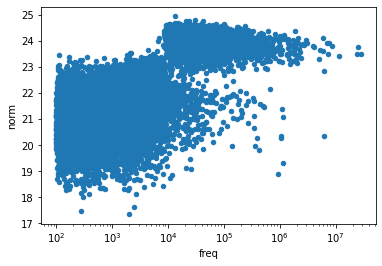

In [7]:
og_context = og_context.set_index(1537).join(freq.set_index('index'), how='inner')
og_context = og_context.dropna()
og_context.plot(x='freq', y='norm', kind='scatter', logx=True)

og_context['freq_logged'] = np.log(og_context['freq'])
og_context[['freq_logged', 'norm']].corr('pearson')

In [8]:
import scipy.stats
#checking pvalues
print(scipy.stats.pearsonr(og_context['freq_logged'].values, og_context['norm'].values))

(0.6777156976637131, 0.0)


# Checking variance

In [17]:
from scipy.spatial import distance
#checking frequency by variance from centroid

# og_context = get_data()
# centroids = og_context.groupby(1537).mean().reset_index()
# distances = pd.DataFrame()
# for n, row in centroids.iterrows():
#     temp = og_context[og_context[1537] == row[1537]]
#     for m, row2 in temp.iterrows():
#         distance_value = distance.euclidean(row2[list(range(0, 768))], row[list(range(0, 768))])
#         distances = pd.concat([distances, pd.DataFrame([[row[1537], distance_value]])])
#     print(row[1537])
# distances.columns = ['keyword', 'distance_from_centroid']

In [34]:
distances = pd.read_csv("other_measurement_distances.csv")

In [47]:
def variance_measurements(distances):
    variance = distances.groupby('keyword').var().reset_index()
    mean = distances.groupby('keyword').mean().reset_index()
    max_value = distances.groupby('keyword').max().reset_index()
    
    for measurement in [mean, max_value, variance]:
        measurement = measurement.set_index('keyword').join(freq.set_index('index'), how='inner', rsuffix='_r').reset_index()

#         measurement.plot(x='freq', y='distance_from_centroid', kind='scatter', logx=True)
        measurement['freq_logged'] = np.log(measurement['freq'])
        print(scipy.stats.pearsonr(measurement['freq_logged'].values, measurement['distance_from_centroid'].values))

In [48]:
variance_measurements(distances)

(0.6013568690589307, 0.0)
(0.5836680939767583, 0.0)
(0.29165674989268375, 2.68925497311233e-195)


# Convex Hull

(0.6027283537103696, 0.0)


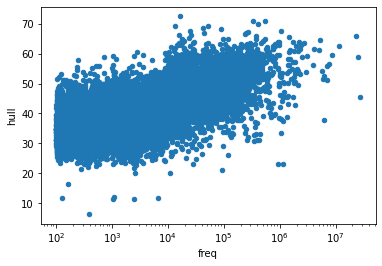

In [12]:
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull, convex_hull_plot_2d
pca = PCA(n_components=2)
hulls = []
for n, group in og_context.groupby(1537):
    principalComponents = pca.fit_transform(group[list(range(0, 768))])
    hulls.append(ConvexHull(principalComponents).area)

hull_df = og_context.groupby(1537).mean().reset_index()
hull_df['hull'] = hulls
hull_df = hull_df.set_index(1537).join(freq.set_index('index'), how='inner', rsuffix='_r')
hull_df.plot(x='freq', y='hull', kind='scatter', logx=True)
hull_df['freq_logged'] = np.log(hull_df['freq'])
hull_df[['freq_logged', 'hull']].corr('pearson')
print(scipy.stats.pearsonr(hull_df['freq_logged'].values, hull_df['hull'].values))